In [1]:
import pandas as pd

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('target_enhance.csv', low_memory=False)

In [4]:
df.isnull().sum()

unsubs_from          0
unsubs_date          0
revenue              0
subs_date            0
source             604
country              0
operator             0
profile_status       0
status               0
service_price        0
publisher            0
adnet                0
service              0
success_billing      0
dtype: int64

In [5]:
df['success_billing'].value_counts()

success_billing
0      232030
1       14513
2        6399
5        5192
3        4900
        ...  
164         1
200         1
177         1
147         1
214         1
Name: count, Length: 179, dtype: int64

In [6]:
mode_val=df['source'].mode()[0]
df['source']=df['source'].fillna(mode_val)

In [7]:
df['success_billing'].value_counts()

success_billing
0      232030
1       14513
2        6399
5        5192
3        4900
        ...  
164         1
200         1
177         1
147         1
214         1
Name: count, Length: 179, dtype: int64

In [8]:
df_encoded = df.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'O' else x)

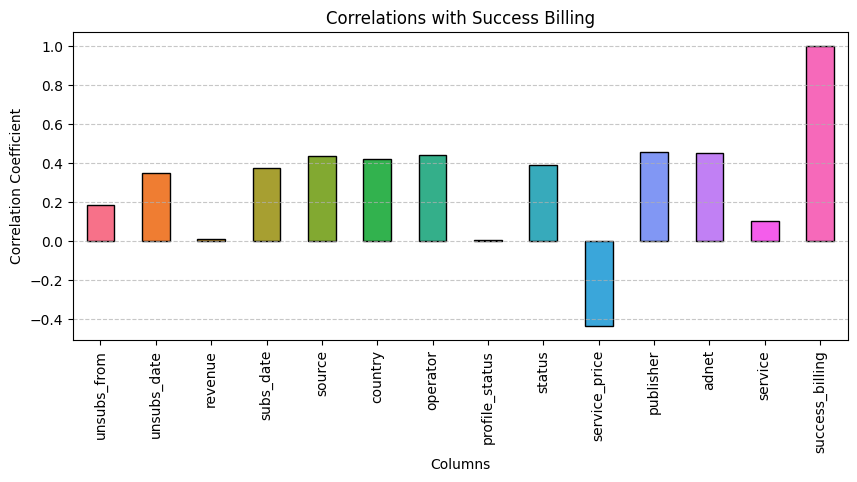

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

correlations = df_encoded.corrwith(df_encoded['success_billing'])

#  color palette with distinct colors
colors = sns.color_palette("husl", len(correlations))

# Plotting the correlations with different colors
correlations.plot(kind='bar', figsize=(10, 4), color=colors, edgecolor='black')
plt.title('Correlations with Success Billing')
plt.xlabel('Columns')
plt.ylabel('Correlation Coefficient')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


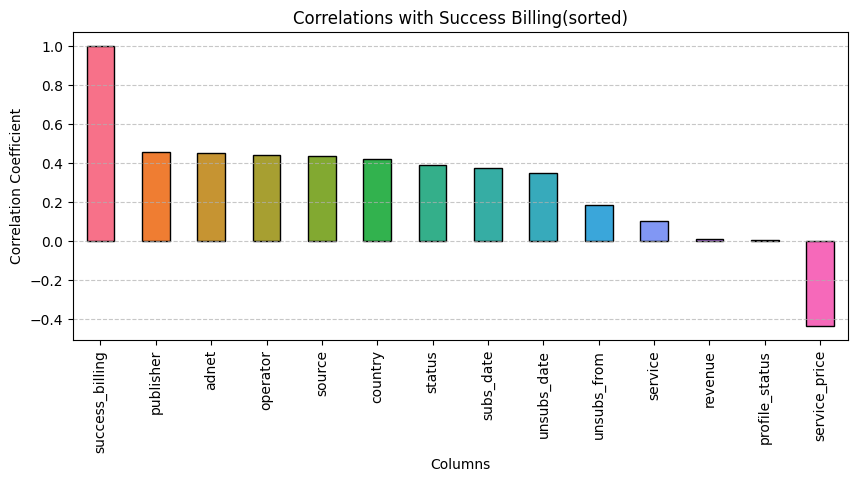

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




correlations = df_encoded.corrwith(df_encoded['success_billing'])

# Sort correlations in descending order
sorted_correlations = correlations.sort_values(ascending=False)

#  a color palette with distinct colors
colors = sns.color_palette("husl", len(sorted_correlations))

# Plotting the correlations with different colors
sorted_correlations.plot(kind='bar', figsize=(10, 4), color=colors, edgecolor='black')
plt.title('Correlations with Success Billing(sorted)')
plt.xlabel('Columns')
plt.ylabel('Correlation Coefficient')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


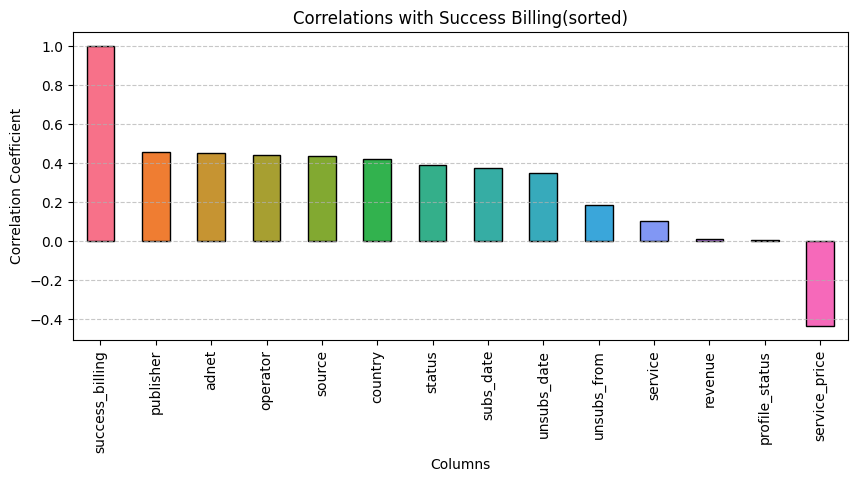

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


correlation_matrix = df_encoded.corr()

# Create a color palette with distinct colors
colors = sns.color_palette("husl", len(correlation_matrix))

# Plotting the correlation matrix with different colors
sorted_correlations = correlation_matrix['success_billing'].sort_values(ascending=False)
sorted_correlations.plot(kind='bar', figsize=(10, 4), color=colors, edgecolor='black')
plt.title('Correlations with Success Billing(sorted)')
plt.xlabel('Columns')
plt.ylabel('Correlation Coefficient')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [12]:
df['service'].unique()

array(['gemezz', 'slypee', 'halogame', 'goaly'], dtype=object)

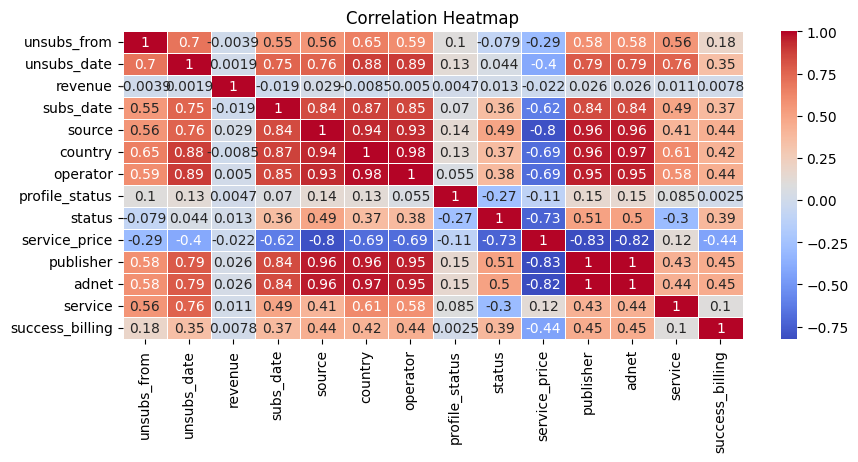

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Convert non-numeric columns to numeric using label encoding


# Now, calculate correlations
correlations = df_encoded.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


categorical_cols = df.select_dtypes(include=['object']).columns


label_encoder = LabelEncoder()
df_encoded = df.copy()

for col in categorical_cols:
    df_encoded[col] = label_encoder.fit_transform(df[col])


X = df_encoded.drop('success_billing', axis=1)
y = df['success_billing'].apply(lambda x: 1 if x > 0 else 0)


rfc = RandomForestClassifier()

# Train the model
rfc.fit(X, y)

# Extract and print feature importances
feature_importance = pd.Series(rfc.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
print(feature_importance)


revenue           0.473567
status            0.118528
publisher         0.083079
subs_date         0.076100
country           0.063004
operator          0.052203
unsubs_date       0.044634
source            0.031798
service_price     0.024519
adnet             0.018176
unsubs_from       0.008998
service           0.003652
profile_status    0.001741
dtype: float64


In [16]:
df['success_billing']=df['success_billing'].apply(lambda x: 1 if x > 0 else 0)

In [17]:
df['success_billing'].value_counts()

success_billing
0    232030
1     76881
Name: count, dtype: int64

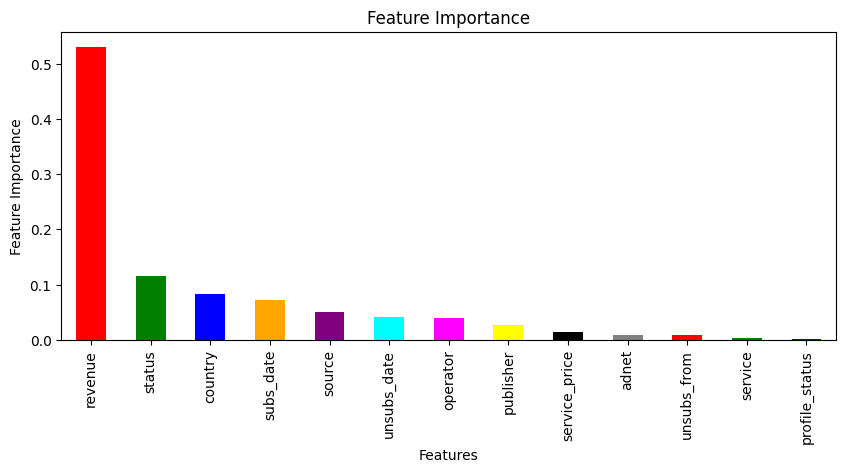

In [18]:



categorical_cols = df.select_dtypes(include=['object']).columns

# Apply label encoding to all categorical variables
label_encoder = LabelEncoder()
df_encoded = df.copy()

for col in categorical_cols:
    df_encoded[col] = label_encoder.fit_transform(df[col])


X = df_encoded.drop('success_billing', axis=1)
y = df['success_billing'].apply(lambda x: 1 if x > 0 else 0)


rfc = RandomForestClassifier()

# Train the model
rfc.fit(X, y)

# Extract and print feature importances
feature_importance = pd.Series(rfc.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# Define a list of distinct colors
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'black', 'gray']

# Plotting feature importances with different colors
feature_importance.plot(kind='bar', figsize=(10, 4), color=colors)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance')
plt.show()


In [19]:
y = df['success_billing'].apply(lambda x: 1 if x > 0 else 0)
X = df.drop('success_billing', axis=1)



In [20]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#preprocessing incase we forgot to convert some datatypes
numeric_features=X.select_dtypes(include=['int64', 'float64']).columns
categorical_features=X.select_dtypes(include=['object']).columns



In [22]:
#using Pipelie to to scale features using StandardScaler and incase we forgot to handle mising values for some numerical columns to 
#impute them with the mean
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [23]:
#Encoding all the categoricalvariables using one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [24]:
df.isnull().sum()

unsubs_from        0
unsubs_date        0
revenue            0
subs_date          0
source             0
country            0
operator           0
profile_status     0
status             0
service_price      0
publisher          0
adnet              0
service            0
success_billing    0
dtype: int64

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split



numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

knn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))  
])

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)



accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)



Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92     46399
           1       0.76      0.81      0.78     15384

    accuracy                           0.89     61783
   macro avg       0.85      0.86      0.85     61783
weighted avg       0.89      0.89      0.89     61783



In [26]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder



X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, weights=[0.9, 0.1], random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), slice(0, X.shape[1])), 
        ('cat', OneHotEncoder(), []),
    ])


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampling', SMOTE(random_state=42)),  # Add SMOTE step
    ('classifier', DecisionTreeClassifier(random_state=42))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       175
           1       0.66      0.84      0.74        25

    accuracy                           0.93       200
   macro avg       0.82      0.89      0.85       200
weighted avg       0.94      0.93      0.93       200

